## Load dataset

In [1]:
import pandas as pd

df = pd.read_csv(r'.\dataset\PRICE.csv')

#print(df.head(5))

df

CATEGORY  SKU  YEAR  WEEK  SYSTEM PRICE  Competitor's price  NetCost  \
0             1  101  2013    29         28.11               32.55    27.94   
1             1  101  2013    30         30.50               32.55    27.94   
2             1  101  2013    31         30.50               32.55    27.94   
3             1  101  2013    32         30.50               32.55    27.94   
4             1  101  2013    33         29.50               32.55    27.94   
5             1  101  2013    34         29.50               32.55    27.94   
6             1  101  2013    35         29.50               32.55    27.94   
7             1  101  2013    36         29.50               32.55    27.94   
8             1  101  2013    37         27.52               32.55    27.94   
9             1  101  2013    38         27.52               32.55    27.94   
10            1  101  2013    39         27.58               32.55    27.94   
11            1  101  2013    40         29.36               32.55    27.94   
12            1  101  2013    41         24.72               32.55    27.94   
13            1  101  2013    42         28.22               32.55    27.94   
14            1  101  2013    43          0.00               32.55    27.94   
15            1  101  2013    44          0.00               32.55    27.94   
16            1  101  2013    45         25.85               32.55    27.94   
17            1  101  2013    46          0.00               32.55    27.94   
18            1  101  2013    47         31.90               32.55    27.94   
19            1  101  2013    48         31.90               32.55    27.94   
20            1  101  2013    49         28.00               32.55    27.94   
21            1  101  2013    50         28.00               32.55    27.94   
22            1  101  2013    51         28.00               32.55    27.94   
23            1  101  2013    52         28.00               32.55    27.94   
24            1  101  2014     1         27.64                0.00    27.94   
25            1  101  2014    10         29.00               32.55    27.94   
26            1  101  2014    11         29.00               32.55    27.94   
27            1  101  2014    12         29.00               32.55    27.94   
28            1  101  2014    13         28.90               32.55    27.94   
29            1  101  2014    14         28.90               32.55    27.94   
...         ...  ...   ...   ...           ...                 ...      ...   
78548         9  216  2014    44         63.90               60.79    46.28   
78549         9  216  2014    45         63.90               60.79    46.28   
78550         9  216  2014    46         60.90               60.79    46.28   
78551         9  216  2014    47         63.90               60.79    46.28   
78552         9  216  2014    48         63.90               60.79    46.28   
78553         9  216  2014    49         60.90               60.79    46.28   
78554         9  216  2014     5         62.50                0.00    46.28   
78555         9  216  2014    50         63.90               60.79    46.28   
78556         9  216  2014    51         63.90               60.79    46.28   
78557         9  216  2014    52         63.90               60.79    46.28   
78558         9  216  2014     6         62.50               59.45    46.28   
78559         9  216  2014     7         62.50               59.45    46.28   
78560         9  216  2014     8         62.50               59.45    46.28   
78561         9  216  2014     9         62.50               59.45    46.28   
78562         9  216  2015     1         63.90               60.79    46.28   
78563         9  216  2015    11         61.50               61.40    46.28   
78564         9  216  2015    12         64.50               61.40    46.28   
78565         9  216  2015    13         64.50               61.40    46.28   
78566         9  216  2015    14         64.50           

In [2]:
df.describe()[['SYSTEM PRICE', 'Competitor\'s price',
       'NetCost', 'UNITS', 'SALES AMOUNT', 'REAL PRICE', 'PROMOTION']]

SYSTEM PRICE  Competitor's price       NetCost         UNITS  \
count  78578.000000        78578.000000  78578.000000  78578.000000   
mean      18.182821            6.747839     12.194354    404.515042   
std       15.489679           13.107655     10.487765    686.681545   
min        0.000000            0.000000      0.000000      1.000000   
25%        9.050000            0.000000      5.880000     78.000000   
50%       13.900000            0.000000      8.870000    206.000000   
75%       22.000000           10.000000     15.180000    450.000000   
max      139.500000          109.900000     94.900000  25183.000000   

        SALES AMOUNT    REAL PRICE     PROMOTION  
count   78578.000000  78578.000000  78578.000000  
mean     4886.716400     17.485463      0.168546  
std      6636.272642     14.081522      0.374353  
min         2.310000      0.860000      0.000000  
25%      1144.000000      9.050000      0.000000  
50%      2779.315000     13.350000      0.000000  
75%      5791.487500     21.267500      0.000000  
max    153744.500000    120.260000      1.000000

In [3]:
print(df.columns)

Index(['CATEGORY', 'SKU', 'YEAR', 'WEEK', 'SYSTEM PRICE', 'Competitor's price',
       'NetCost', 'UNITS', 'SALES AMOUNT', 'REAL PRICE', 'MIN TEMP',
       'AVG TEMP', 'MAX TEMP', 'RAIN INTENSITY', 'PROMOTION'],
      dtype='object')


In [4]:
import datetime as dt
def GetWeekDate(year, week):
    d = "{}-W{}".format(year, week)
    r = dt.datetime.strptime(d + '-0', "%Y-W%W-%w")
    return r

df['date'] = df[['YEAR','WEEK']].apply(lambda x : GetWeekDate(x[0],x[1]), axis=1)

df['profit'] = df[['REAL PRICE','NetCost','UNITS']].apply(lambda x :x[2]*(x[0]-x[1]), axis=1)

In [5]:
df

CATEGORY  SKU  YEAR  WEEK  SYSTEM PRICE  Competitor's price  NetCost  \
0             1  101  2013    29         28.11               32.55    27.94   
1             1  101  2013    30         30.50               32.55    27.94   
2             1  101  2013    31         30.50               32.55    27.94   
3             1  101  2013    32         30.50               32.55    27.94   
4             1  101  2013    33         29.50               32.55    27.94   
5             1  101  2013    34         29.50               32.55    27.94   
6             1  101  2013    35         29.50               32.55    27.94   
7             1  101  2013    36         29.50               32.55    27.94   
8             1  101  2013    37         27.52               32.55    27.94   
9             1  101  2013    38         27.52               32.55    27.94   
10            1  101  2013    39         27.58               32.55    27.94   
11            1  101  2013    40         29.36               32.55    27.94   
12            1  101  2013    41         24.72               32.55    27.94   
13            1  101  2013    42         28.22               32.55    27.94   
14            1  101  2013    43          0.00               32.55    27.94   
15            1  101  2013    44          0.00               32.55    27.94   
16            1  101  2013    45         25.85               32.55    27.94   
17            1  101  2013    46          0.00               32.55    27.94   
18            1  101  2013    47         31.90               32.55    27.94   
19            1  101  2013    48         31.90               32.55    27.94   
20            1  101  2013    49         28.00               32.55    27.94   
21            1  101  2013    50         28.00               32.55    27.94   
22            1  101  2013    51         28.00               32.55    27.94   
23            1  101  2013    52         28.00               32.55    27.94   
24            1  101  2014     1         27.64                0.00    27.94   
25            1  101  2014    10         29.00               32.55    27.94   
26            1  101  2014    11         29.00               32.55    27.94   
27            1  101  2014    12         29.00               32.55    27.94   
28            1  101  2014    13         28.90               32.55    27.94   
29            1  101  2014    14         28.90               32.55    27.94   
...         ...  ...   ...   ...           ...                 ...      ...   
78548         9  216  2014    44         63.90               60.79    46.28   
78549         9  216  2014    45         63.90               60.79    46.28   
78550         9  216  2014    46         60.90               60.79    46.28   
78551         9  216  2014    47         63.90               60.79    46.28   
78552         9  216  2014    48         63.90               60.79    46.28   
78553         9  216  2014    49         60.90               60.79    46.28   
78554         9  216  2014     5         62.50                0.00    46.28   
78555         9  216  2014    50         63.90               60.79    46.28   
78556         9  216  2014    51         63.90               60.79    46.28   
78557         9  216  2014    52         63.90               60.79    46.28   
78558         9  216  2014     6         62.50               59.45    46.28   
78559         9  216  2014     7         62.50               59.45    46.28   
78560         9  216  2014     8         62.50               59.45    46.28   
78561         9  216  2014     9         62.50               59.45    46.28   
78562         9  216  2015     1         63.90               60.79    46.28   
78563         9  216  2015    11         61.50               61.40    46.28   
78564         9  216  2015    12         64.50               61.40    46.28   
78565         9  216  2015    13         64.50               61.40    46.28   
78566         9  216  2015    14         64.50           

In [6]:
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

color_labels = df['SKU'].unique()
print("Unique products:",len(color_labels))
rgb_values = sns.color_palette("Set2", len(color_labels))
color_map = dict(zip(range(len(color_labels)), rgb_values))

df.sort_values(by=['SKU', 'date'], inplace=True)
df.sort_values(by=['SKU', 'date'], inplace=True)

Unique products: 1030


In [7]:
def PlotVariable(varname, skus=None, categories=None):
    import datetime
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    import matplotlib.cbook as cbook

    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    yearsFmt = mdates.DateFormatter('%Y')
    monthsFmt = mdates.DateFormatter('%m')

    # Load a numpy record array from yahoo csv data with fields date, open, close,
    # volume, adj_close from the mpl-data/example directory. The record array
    # stores the date as an np.datetime64 with a day unit ('D') in the date column.

    fig, ax = plt.subplots(figsize=(15,10))
    if categories is None:
        if skus is not None:
            prev_color=None
            for sku in skus:
                if(prev_color!=color_map[(sku) % len(color_map)]):
                    sku_color=color_map[(sku) % len(color_map)]
                else:
                    sku_color=color_map[(sku + 1) % len(color_map)]
                ax.plot(df['date'][df['SKU']==sku], df[varname][df['SKU']==sku], c=sku_color, label=str(sku))
                prev_color=sku_color
        else:
            for sku in color_labels[:20]:
                ax.plot(df['date'][df['SKU']==sku], df[varname][df['SKU']==sku], c=color_map[(sku) % len(color_map)], label=str(sku))
    else:
        for cat in categories:
            cat_df=pd.DataFrame({varname : df.groupby(["date","CATEGORY"])[varname].sum()}).reset_index()
            cat_df=cat_df.pivot_table(index=['date'],columns=['CATEGORY'], values=[varname], aggfunc=np.sum, fill_value=0)
            cat_df.columns = cat_df.columns.droplevel(0)
            cat_df.reset_index(level=['date'], inplace=True)
            ax.plot(cat_df['date'], cat_df[cat], c=color_map[(cat) % len(color_map)], label=str(cat))

    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(monthsFmt)

    # round to nearest years...
    #datemin = np.datetime64(df.date[0], 'Y')
    #datemax = np.datetime64(df.date[-1], 'Y') + np.timedelta64(1, 'Y')
    #ax.set_xlim(datemin, datemax)


    # format the coords message box
    def price(x):
        return '$%1.2f' % x
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.format_ydata = price
    ax.grid(True)

    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()

    plt.show()

## REAL PRICE

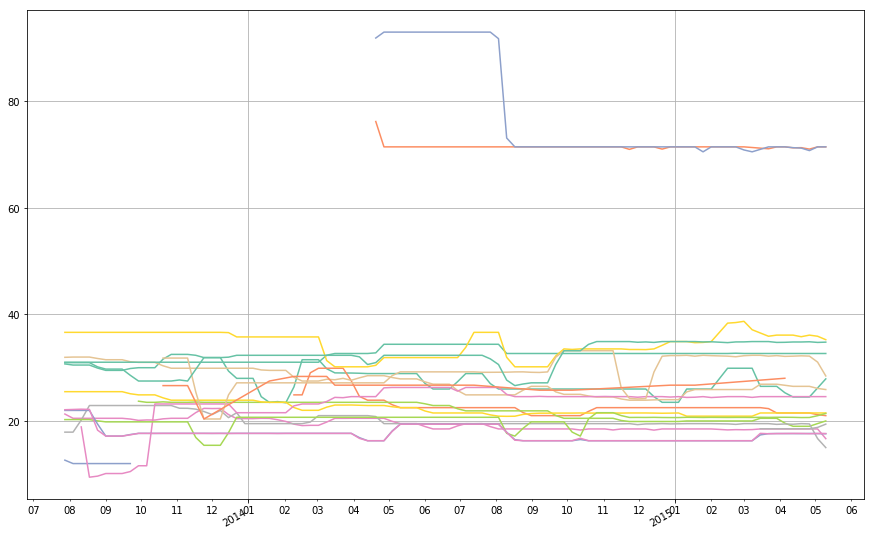

## SYSTEM PRICE

## NetCost

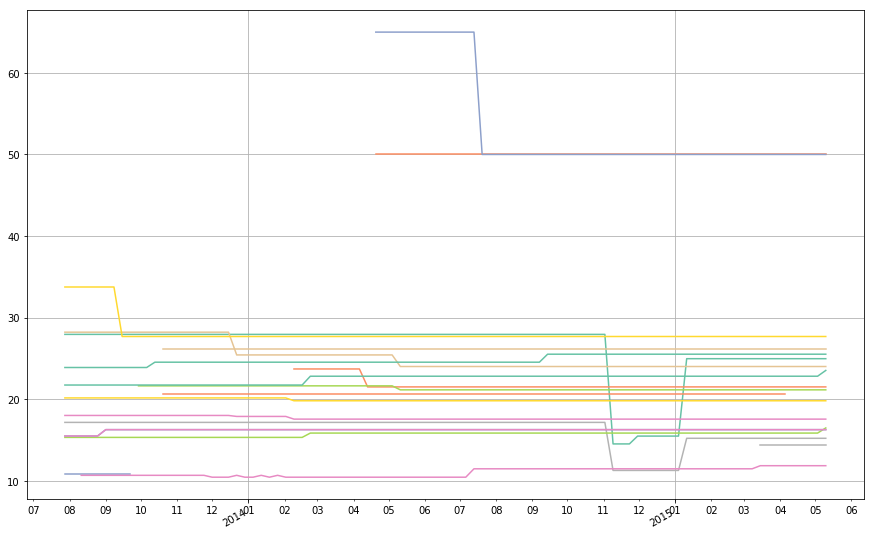

## Competitor's price

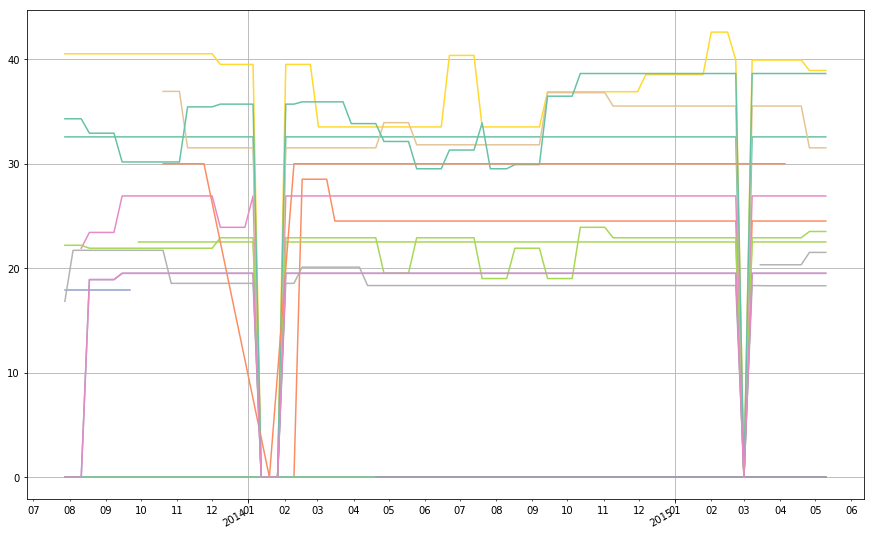

## UNITS

In [8]:
vars=['REAL PRICE', 'SYSTEM PRICE', 'NetCost', 'Competitor\'s price', 'UNITS']

from IPython.display import display, Markdown, Latex

for var in vars:
    display(Markdown('## {}'.format(var)))
    PlotVariable(var)

In [9]:
from IPython.display import display_markdown, Math, Markdown
from scipy.stats.stats import pearsonr   
import warnings
warnings.filterwarnings('ignore')

outputs0=['CATEGORY', 'SKU', 'SYSTEM PRICE', 'Competitor\'s price',
       'NetCost', 'UNITS', 'SALES AMOUNT', 'REAL PRICE', 'MIN TEMP',
       'AVG TEMP', 'MAX TEMP', 'RAIN INTENSITY', 'PROMOTION']

columns=['CATEGORY', 'SKU', 'SYSTEM PRICE', 'Competitor\'s price',
       'NetCost', 'UNITS', 'SALES AMOUNT', 'REAL PRICE', 'MIN TEMP',
       'AVG TEMP', 'MAX TEMP', 'RAIN INTENSITY', 'PROMOTION']

outputs=outputs0[:20]
table="Attribute | " + '|'.join(outputs) +"\n"
table=table + ":-----------|" + '|'.join([':------------' for i in range(len(outputs))]) + "\n"
for i in columns:
    table=table +"{0}|".format(i)
    table=table +'|'.join(["{1:2.2f}".format(i, pearsonr(df[i],df[o])[0]*100) for o in outputs])
    table=table + "\n"

display_markdown(table, raw=True)

Attribute | CATEGORY|SKU|SYSTEM PRICE|Competitor's price|NetCost|UNITS|SALES AMOUNT|REAL PRICE|MIN TEMP|AVG TEMP|MAX TEMP|RAIN INTENSITY|PROMOTION
:-----------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------|:------------
CATEGORY|100.00|58.33|-4.93|-0.10|-7.05|9.90|13.35|-6.10|-0.21|-0.06|0.02|-0.10|-14.41
SKU|58.33|100.00|7.41|4.75|3.32|14.45|18.04|4.64|-0.06|-0.09|-0.12|-0.19|-11.58
SYSTEM PRICE|-4.93|7.41|100.00|45.05|91.90|-24.19|-1.60|96.58|-1.40|0.86|2.22|0.08|-8.40
Competitor's price|-0.10|4.75|45.05|100.00|57.90|-15.94|-4.41|46.21|1.63|2.00|1.71|1.43|-12.68
NetCost|-7.05|3.32|91.90|57.90|100.00|-21.15|3.99|95.78|-0.26|-0.02|0.21|-0.01|-6.13
UNITS|9.90|14.45|-24.19|-15.94|-21.15|100.00|73.07|-22.61|2.42|0.68|-0.48|0.58|26.84
SALES AMOUNT|13.35|18.04|-1.60|-4.41|3.99|73.07|100.00|3.03|3.19|1.31|-0.04|0.54|20.03
REAL PRICE|-6.10|4.64|96.58|46.21|95.78|-22.61|3.03|100.00|-0.06|0.19|0.34|0.29|-7.81
MIN TEMP|-0.21|-0.06|-1.40|1.63|-0.26|2.42|3.19|-0.06|100.00|76.28|40.38|38.77|-0.35
AVG TEMP|-0.06|-0.09|0.86|2.00|-0.02|0.68|1.31|0.19|76.28|100.00|88.76|-0.97|0.62
MAX TEMP|0.02|-0.12|2.22|1.71|0.21|-0.48|-0.04|0.34|40.38|88.76|100.00|-29.87|1.22
RAIN INTENSITY|-0.10|-0.19|0.08|1.43|-0.01|0.58|0.54|0.29|38.77|-0.97|-29.87|100.00|-1.52
PROMOTION|-14.41|-11.58|-8.40|-12.68|-6.13|26.84|20.03|-7.81|-0.35|0.62|1.22|-1.52|100.00


In [431]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pricing Correlation Matrix')
    print(df.columns)
    labels=df.columns
    ax1.set_xticklabels(labels,rotation=45,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    ax1.xaxis.set_ticks(np.arange(0, 16, 1.0))
    ax1.yaxis.set_ticks(np.arange(0, 16, 1.0))
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

Index(['CATEGORY', 'SKU', 'YEAR', 'WEEK', 'SYSTEM PRICE', 'Competitor's price',
       'NetCost', 'UNITS', 'SALES AMOUNT', 'REAL PRICE', 'MIN TEMP',
       'AVG TEMP', 'MAX TEMP', 'RAIN INTENSITY', 'PROMOTION', 'date',
       'profit'],
      dtype='object')


## Pivot

In [308]:
p = pd.DataFrame({'profit sum' : df.groupby(["CATEGORY"])['profit'].sum()}).reset_index()
p.sort_values(by=['profit sum'], ascending=[False], inplace=True)
from scipy import stats
p['percentage']=p['profit sum'].cumsum()/p['profit sum'].sum()*100
p['percentile']=[stats.percentileofscore(p['profit sum'], a, 'rank') for a in p['profit sum']]
p = pd.merge(p[(p['percentage']<=80)], pd.DataFrame({'units sum' : df.groupby(["CATEGORY"])['UNITS'].sum()}).reset_index(), on='CATEGORY')
p['avg profit per item']=p[['profit sum','units sum']].apply(lambda x: x[0]/x[1], axis=1)
most_important_categories=p['CATEGORY']
p

CATEGORY   profit sum  percentage  percentile  units sum  \
0         12  12420397.63   10.699686  100.000000    3004277   
1         11   9773414.24   19.119100   98.571429    1230632   
2         20   8432695.88   26.383538   97.142857    2259989   
3         69   7739172.66   33.050532   95.714286    1946247   
4         40   7490695.84   39.503473   94.285714    2498896   
5         19   7187932.47   45.695596   92.857143    3098637   
6         58   5385522.75   50.335013   91.428571     790415   
7         67   4420937.46   54.143478   90.000000    1578030   
8         34   4125941.86   57.697815   88.571429     220985   
9         46   3733003.08   60.913651   87.142857     513500   
10        59   3242453.14   63.706898   85.714286     683054   
11        13   2978946.25   66.273143   84.285714     642235   
12        33   2795822.56   68.681635   82.857143     825430   
13        68   2738022.01   71.040334   81.428571     311610   
14        39   2641125.71   73.315560   80.000000     495693   
15        16   2589923.35   75.546678   78.571429     525314   
16        14   2506186.34   77.705659   77.142857     565470   
17        56   2271408.42   79.662389   75.714286     437792   

    avg profit per item  
0              4.134238  
1              7.941785  
2              3.731300  
3              3.976460  
4              2.997602  
5              2.319708  
6              6.813538  
7              2.801555  
8             18.670687  
9              7.269724  
10             4.746994  
11             4.638405  
12             3.387110  
13             8.786695  
14             5.328148  
15             4.930239  
16             4.432041  
17             5.188328

In [10]:
pd.DataFrame({'mean' : df.groupby(["CATEGORY"])['UNITS'].mean()}).reset_index()

CATEGORY         mean
0          1   275.270096
1          2   101.731489
2          4   283.818999
3          5    93.770642
4          6    12.074074
5          7    28.554348
6          8   197.437768
7          9   424.172316
8         10    40.091667
9         11   294.550503
10        12   649.713884
11        13   392.084860
12        14   322.388826
13        15   316.190715
14        16   390.568030
15        17   176.995614
16        18   150.515152
17        19   861.689933
18        20   454.451840
19        21   178.028394
20        23  1050.510638
21        24   135.543038
22        25   198.931727
23        26   234.166251
24        27   103.496528
25        28    49.487455
26        29   269.580645
27        30   367.877791
28        31   180.480138
29        32    60.312950
..       ...          ...
40        46   468.094804
41        47  2792.772973
42        48   110.537585
43        49   220.393305
44        50   180.266404
45        51   386.712766
46        52   329.711601
47        53   235.428571
48        54    52.235577
49        55    88.179443
50        56   546.556804
51        57    18.000000
52        58   739.396632
53        59   876.834403
54        60   301.305825
55        61  1556.010753
56        62   408.015248
57        63    22.554677
58        64   203.774574
59        65   305.516129
60        66    77.036232
61        67  1854.324324
62        68   837.661290
63        69  1140.824736
64        70   176.110672
65        72   411.537383
66        73   155.484619
67        74   556.301402
68        75   479.621185
69        76   196.048658

[70 rows x 2 columns]

In [14]:
pd.DataFrame({'std' : df.groupby(["CATEGORY"])['REAL PRICE'].std(ddof=0)}).reset_index()

CATEGORY        std
0          1   3.860933
1          2   9.759178
2          4   5.109582
3          5   0.641507
4          6   1.777173
5          7   1.296330
6          8   6.449682
7          9  18.980047
8         10  14.188091
9         11   5.937694
10        12   2.081699
11        13   7.312623
12        14   5.807068
13        15  23.782702
14        16   9.514507
15        17  11.487749
16        18   1.088427
17        19   4.706161
18        20   5.953436
19        21   0.623973
20        23   5.018668
21        24   6.823337
22        25   5.060839
23        26  28.529429
24        27  10.817505
25        28   6.906158
26        29   5.338758
27        30   5.194926
28        31   3.796388
29        32   1.865326
..       ...        ...
40        46   3.070677
41        47  12.057266
42        48  16.113714
43        49   0.897507
44        50  13.001627
45        51   2.966428
46        52  19.470168
47        53   4.120040
48        54  10.426601
49        55  15.254287
50        56   3.959388
51        57   0.019670
52        58   6.059988
53        59   3.707867
54        60   4.789180
55        61   6.055158
56        62   4.047385
57        63   2.317149
58        64   7.042035
59        65  14.112178
60        66   0.556126
61        67   3.433012
62        68   1.410744
63        69   2.846555
64        70   5.852008
65        72   2.235554
66        73   4.294334
67        74   4.429081
68        75   3.868682
69        76   2.324620

[70 rows x 2 columns]

## FFT

## PCA

## SSA

In [45]:
from mySSA import mySSA
import pandas as pd
import numpy as np
from matplotlib.pylab import rcParams
from matplotlib import pyplot as plt


categoryCount = pd.DataFrame({'count' : df.groupby(["CATEGORY"])['SKU'].count()}).reset_index()
categoryCount.sort_values(['count'], ascending=False, inplace=True)
print(categoryCount.head())

ssaFrame = pd.DataFrame({'mean' : df.groupby(["date", "CATEGORY"])['REAL PRICE'].mean()}).reset_index()
ssaFrame['date'] = pd.to_datetime(ssaFrame['date'])
ssaFrame['count']=ssaFrame['CATEGORY'].apply(lambda x: categoryCount[categoryCount['CATEGORY']==x]['count'].iloc[0])
ssaFrame.sort_values(['date', 'count'], ascending=[1, 0], inplace=True)
ssaFrame.drop(['count'], axis=1, inplace=True)
ssaFrame.set_index('date', inplace=True)
print(ssaFrame.head())

K = 40
suspected_seasonality = 12

    CATEGORY  count
18        20   4973
10        12   4624
30        33   4494
9         11   4178
36        40   3602
            CATEGORY       mean
date                           
2013-07-28        20  12.280488
2013-07-28        12  10.692045
2013-07-28        33  10.926286
2013-07-28        11  26.192045
2013-07-28        40   9.394571


----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  36
Trajectory dimensions	: (36, 58)
Complete dimension	: (36, 58)
Missing dimension     	: (36, 0)
----------------------------------------
DECOMPOSITION SUMMARY:
Rank of trajectory		: 36
Dimension of projection space	: 5
Characteristic of projection	: 0.9998


C:\Users\langh\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


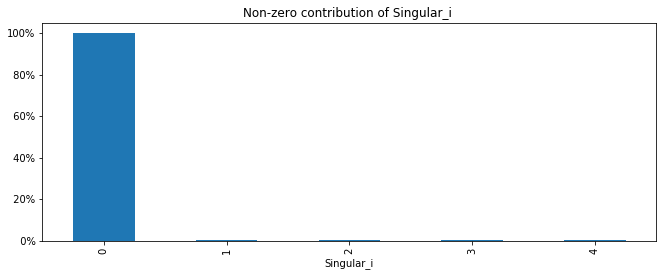

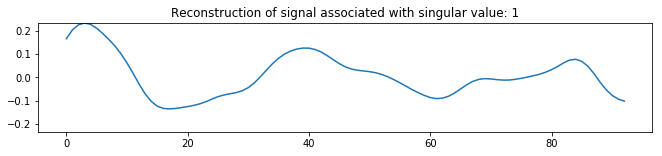

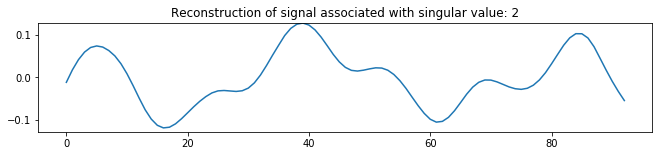

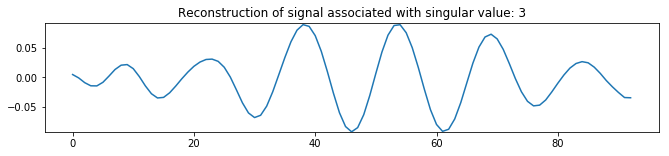

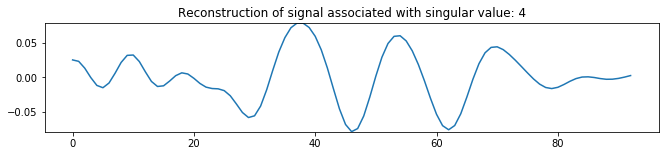

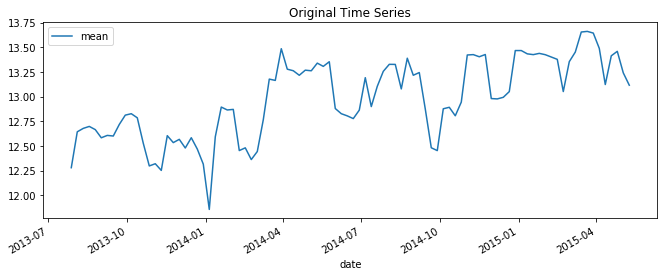

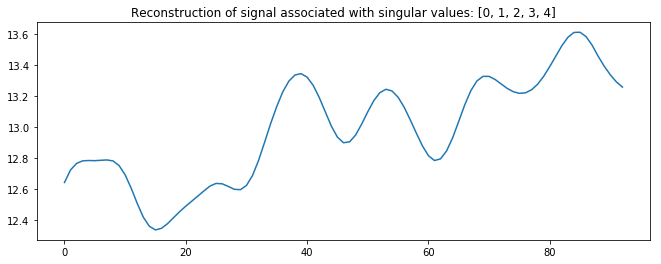

----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  36
Trajectory dimensions	: (36, 58)
Complete dimension	: (36, 58)
Missing dimension     	: (36, 0)
----------------------------------------
DECOMPOSITION SUMMARY:
Rank of trajectory		: 36
Dimension of projection space	: 2
Characteristic of projection	: 0.9999


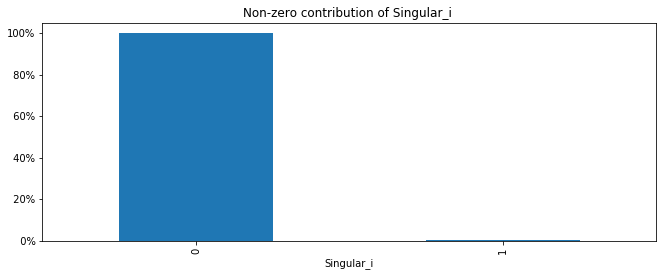

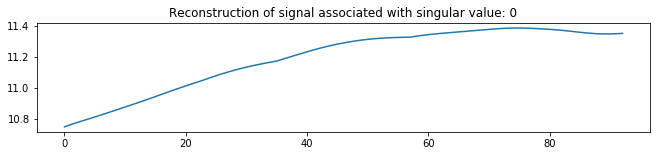

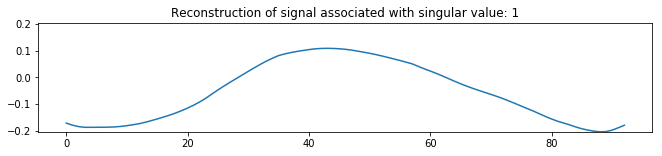

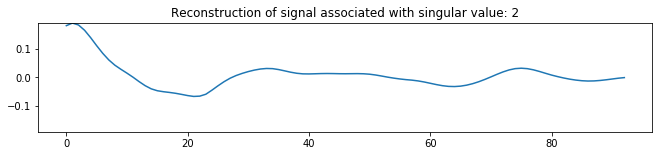

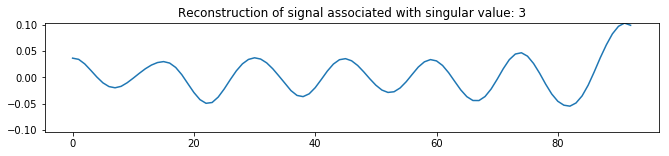

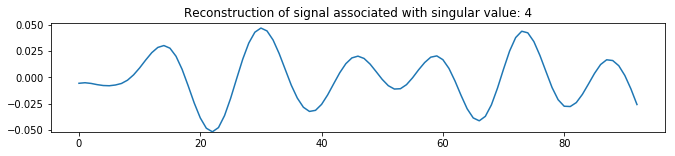

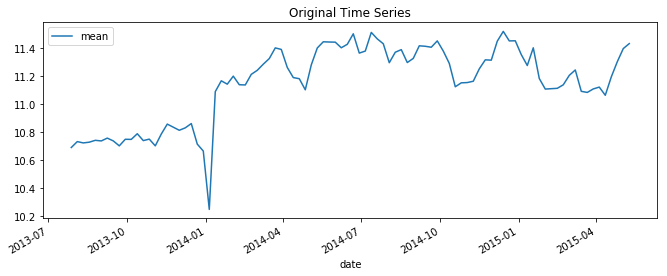

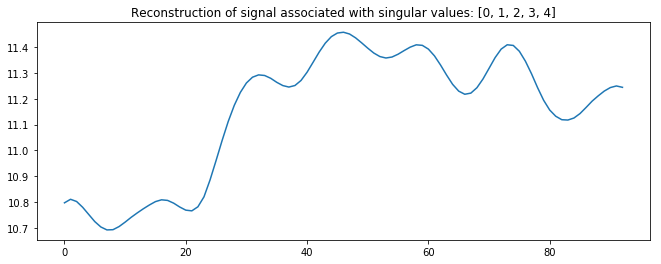

----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  36
Trajectory dimensions	: (36, 58)
Complete dimension	: (36, 58)
Missing dimension     	: (36, 0)
----------------------------------------
DECOMPOSITION SUMMARY:
Rank of trajectory		: 36
Dimension of projection space	: 5
Characteristic of projection	: 0.9997


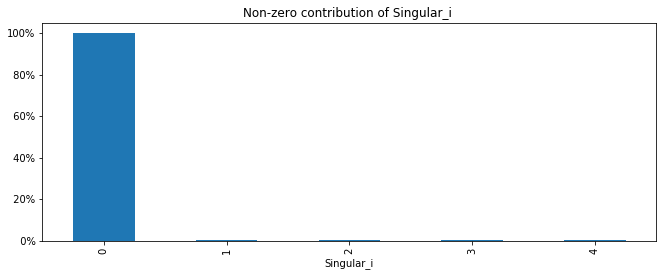

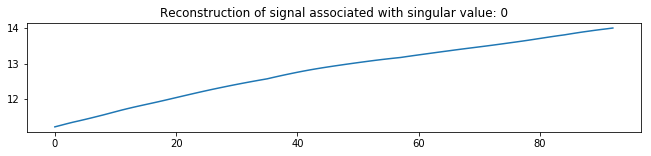

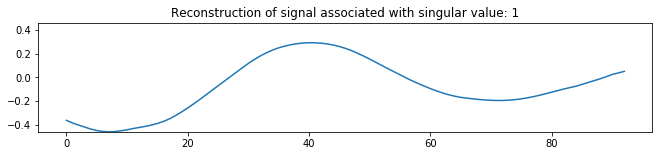

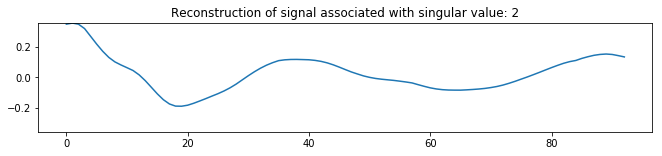

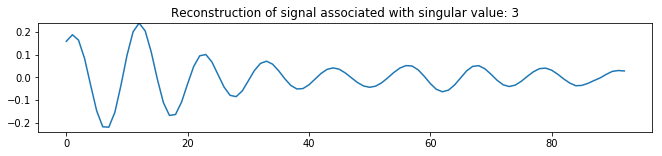

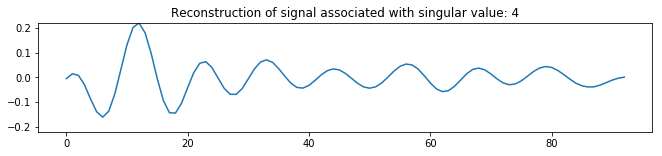

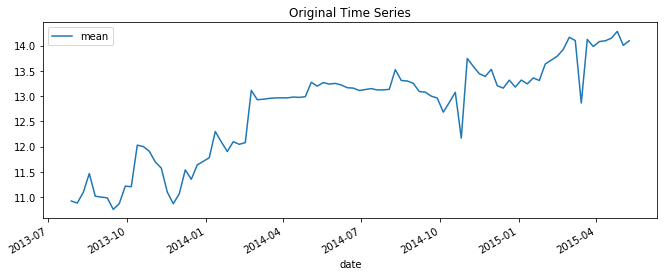

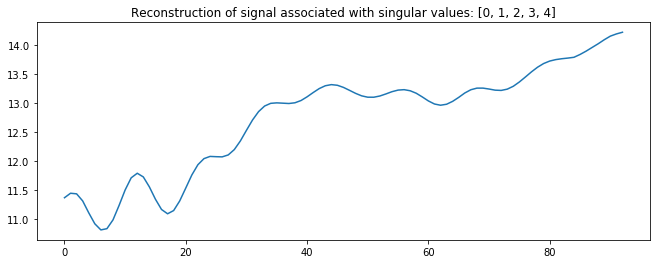

----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  36
Trajectory dimensions	: (36, 58)
Complete dimension	: (36, 58)
Missing dimension     	: (36, 0)
----------------------------------------
DECOMPOSITION SUMMARY:
Rank of trajectory		: 36
Dimension of projection space	: 3
Characteristic of projection	: 0.9998


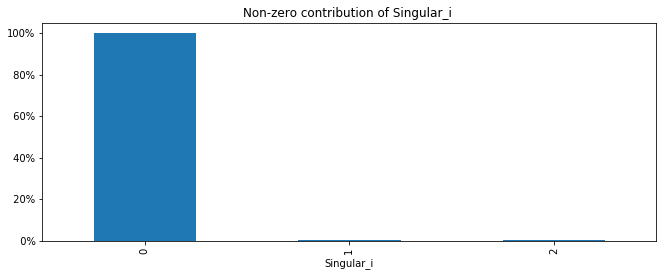

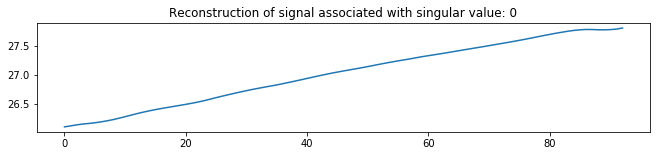

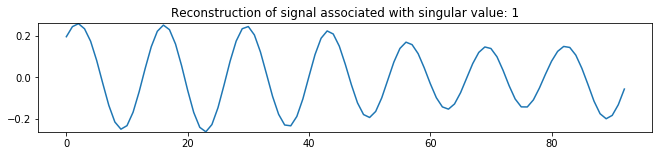

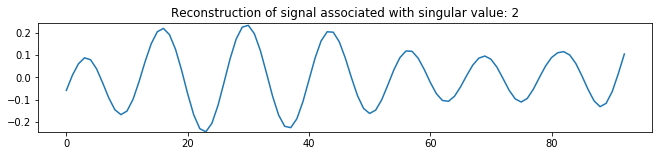

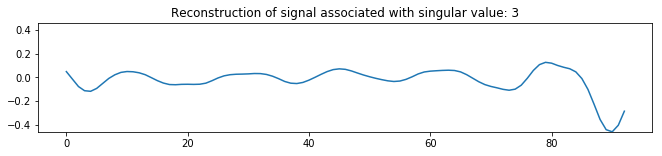

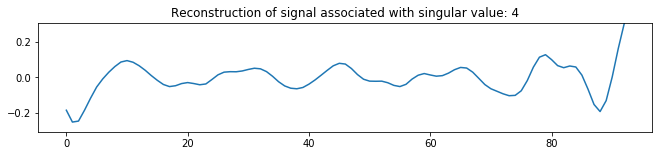

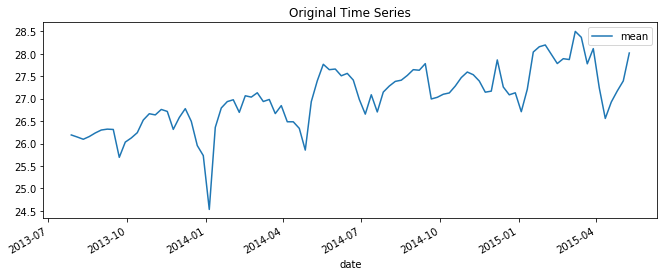

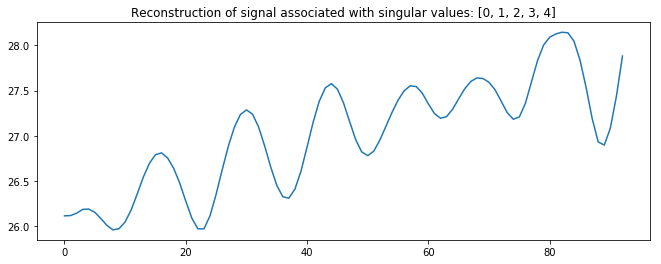

----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  36
Trajectory dimensions	: (36, 58)
Complete dimension	: (36, 58)
Missing dimension     	: (36, 0)
----------------------------------------
DECOMPOSITION SUMMARY:
Rank of trajectory		: 36
Dimension of projection space	: 3
Characteristic of projection	: 0.9998


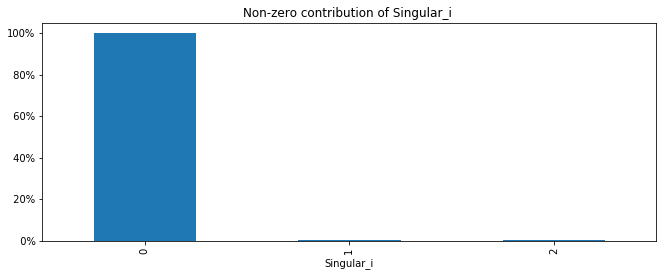

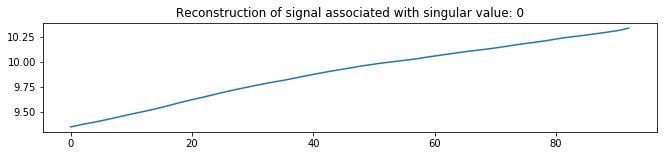

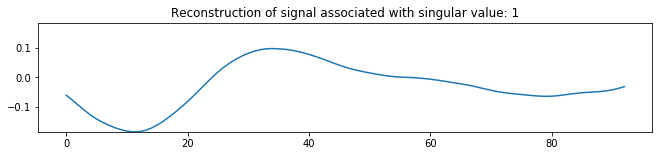

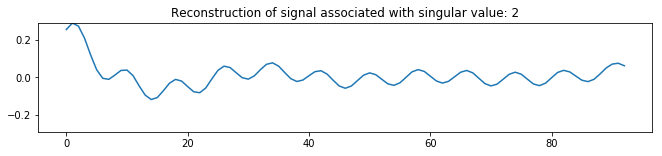

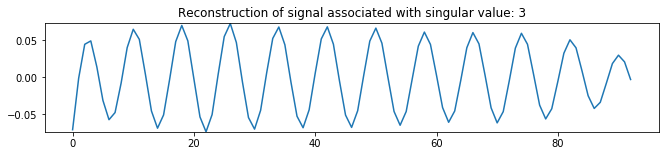

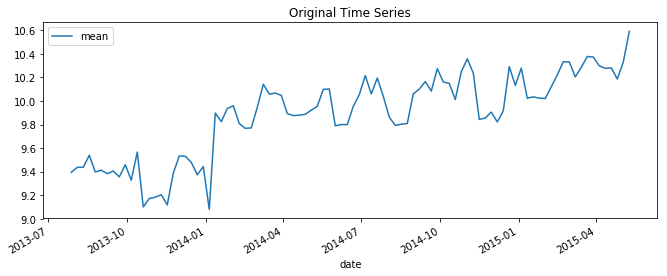

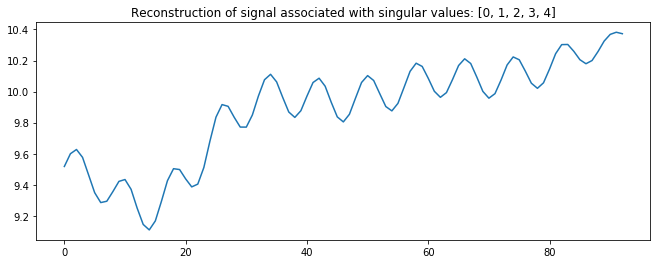

In [49]:
for cat in ssaFrame['CATEGORY'].values[:5]:
    ssaFrameCat=ssaFrame[ssaFrame['CATEGORY']==cat]
    ssaFrameCat.drop(['CATEGORY'], axis=1, inplace=True)
    ssa = mySSA(ssaFrameCat)
    ssa.embed(embedding_dimension=40, suspected_frequency=suspected_seasonality, verbose=True)
    ssa.decompose(verbose=True)
    rcParams['figure.figsize'] = 11, 4
    ssa.view_s_contributions()
    plt.show()
    rcParams['figure.figsize'] = 11, 2
    for i in range(5):
        ssa.view_reconstruction(ssa.Xs[i], names=i, symmetric_plots=i!=0)
    rcParams['figure.figsize'] = 11, 4
    plt.show()
    ssa.ts.plot(title='Original Time Series'); # This is the original series for comparison
    plt.show()
    streams5 = [i for i in range(5)]
    reconstructed5 = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams5], names=streams5, return_df=True)
    plt.show()

In [10]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot, autocorrelation_plot
import pandas as pd

series = pd.Series(df.UNITS)
lag_plot(series)
pyplot.show()

autocorrelation_plot(series)
pyplot.show()

C:\Users\langh\Miniconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.


C:\Users\langh\Miniconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


In [ ]:
df['date'] = df[['YEAR','WEEK']].apply(lambda x : GetWeekDate(x[0],x[1]), axis=1)

### Cannibalizations

In [8]:
import math
import numpy as np
print(df.columns)
p = pd.DataFrame({'UNITS' : df.groupby(["date","SKU"])['UNITS'].sum()}).reset_index()
print(len(p.date.unique()))
p = p.pivot_table(index=['date'],columns=['SKU'], values=['UNITS'], aggfunc=np.sum, fill_value=0)
p.columns = p.columns.droplevel(0)

import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg
from scipy import stats
from scipy.stats import mstats 
import numpy as np
from scipy.stats.stats import pearsonr 
import os
import pickle as pkl

if(not os.path.exists("sku_correlations.pkl")):
    correlations=np.zeros((len(p.columns),len(p.columns)))
    print(correlations.shape)
    correlations_mat = p.as_matrix()
    for sku1 in range(len(p.columns)):
        for sku2 in range(len(p.columns)):
            correlations[sku1,sku2]=0
            if(sku1==sku2):
                correlations[sku1,sku2]=1
                continue
            zero_filter = correlations_mat[((correlations_mat[:,sku1]>0) & (correlations_mat[:,sku2]>0)),:]
            if(len(zero_filter)<31):
                continue
            #print(zero_filter.shape)
            correlations[sku1,sku2]=pearsonr(zero_filter[:,sku1],zero_filter[:,sku2])[0]
            if(sku2==1029):
                print(sku1,sku2)
    pkl.dump({"sku_correlations":correlations}, open( "sku_correlations.pkl", "wb" ))
else:
    with open('sku_correlations.pkl', 'rb') as f:
        data = pkl.load(f)
        correlations=data['sku_correlations']

print(correlations.shape)
correlations=pd.DataFrame(correlations)
#correlations = p.corr()
correlations_mat = correlations.as_matrix()
print(correlations_mat.shape)
names = p.columns
print(names)

def getAttribute(sku, attribute):
    return df[attribute][df['SKU']==sku].as_matrix()[0]

def getAttributeMean(sku, attribute):
    return df[attribute][df['SKU']==sku].as_matrix().mean()

#print(correlations)
i,j = np.where(correlations_mat <= -0.6)
print(list(zip(i,j))[0])
canibalizations=[[p.columns[c[0]],p.columns[c[1]],correlations_mat[c[0],c[1]]] for c in list(zip(i,j)) if c[0]<=c[1]]
print(len(canibalizations))
canibalizations=pd.DataFrame(canibalizations, columns=['sku1', 'sku2', 'correlation'])
canibalizations.sort_values(by=['correlation'], ascending=[True], inplace=True)
canibalizations['cat1'] = canibalizations[['sku1']].apply((lambda x: getAttribute(x[0],'CATEGORY')), axis=1)
canibalizations['cat2'] = canibalizations[['sku2']].apply((lambda x: getAttribute(x[0],'CATEGORY')), axis=1)
canibalizations['price1'] = canibalizations[['sku1']].apply((lambda x: getAttributeMean(x[0],'REAL PRICE')), axis=1)
canibalizations['price2'] = canibalizations[['sku2']].apply((lambda x: getAttributeMean(x[0],'REAL PRICE')), axis=1)
rel_tol = 2e-1
abs_tol = 3
canibalizations['price_is_close']=canibalizations[['price1','price2']].apply(lambda x: math.isclose(x[0], x[1], rel_tol=rel_tol, abs_tol=abs_tol), axis=1)
canibalizations=canibalizations[((canibalizations['cat1']==canibalizations['cat2']) & canibalizations['price_is_close'])]
print(canibalizations)
print(canibalizations.shape)

correlations_mat[correlations_mat > 0]=1
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_mat, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Index(['CATEGORY', 'SKU', 'YEAR', 'WEEK', 'SYSTEM PRICE', 'Competitor's price',
       'NetCost', 'UNITS', 'SALES AMOUNT', 'REAL PRICE', 'MIN TEMP',
       'AVG TEMP', 'MAX TEMP', 'RAIN INTENSITY', 'PROMOTION', 'date',
       'profit'],
      dtype='object')
93


C:\Users\langh\Miniconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(1030, 1030)
0 1029
1 1029
3 1029
4 1029
5 1029
6 1029
7 1029
8 1029
10 1029
11 1029
12 1029
13 1029
14 1029
16 1029
17 1029
18 1029
19 1029
22 1029
23 1029
24 1029
25 1029
26 1029
27 1029
28 1029
29 1029
30 1029
31 1029
32 1029
33 1029
34 1029
35 1029
36 1029
37 1029
38 1029
39 1029
40 1029
41 1029
42 1029
43 1029
44 1029
45 1029
46 1029
47 1029
48 1029
49 1029
50 1029
51 1029
52 1029
53 1029
55 1029
56 1029
57 1029
58 1029
59 1029
60 1029
61 1029
62 1029
63 1029
64 1029
65 1029
66 1029
69 1029
70 1029
71 1029
72 1029
73 1029
74 1029
75 1029
77 1029
78 1029
79 1029
81 1029
83 1029
85 1029
86 1029
87 1029
88 1029
89 1029
90 1029
91 1029
92 1029
93 1029
94 1029
95 1029
96 1029
97 1029
98 1029
99 1029
100 1029
102 1029
103 1029
104 1029
107 1029
108 1029
110 1029
111 1029
112 1029
113 1029
114 1029
115 1029
116 1029
117 1029
118 1029
119 1029
120 1029
121 1029
122 1029
123 1029
124 1029
125 1029
126 1029
127 1029
128 1029
130 1029
131 1029
132 1029
133 1029
134 1029
136 1029
138 1029
139

1018 1029
1019 1029
1020 1029
1021 1029
1022 1029
1024 1029
1025 1029
1026 1029
1027 1029
(1030, 1030)
(1030, 1030)
Int64Index([ 101,  102,  103,  105,  107,  108,  109,  110,  111,  112,
            ...
            1501, 1517, 1518, 1521, 1522, 1524, 1525, 1530, 1536, 1539],
           dtype='int64', name='SKU', length=1030)
(1, 25)
697
     sku1  sku2  correlation  cat1  cat2     price1     price2  price_is_close
569   793   797    -0.888922    20    20  14.857241  16.065000            True
559   735   797    -0.882422    20    20  16.894130  16.065000            True
669  1204  1209    -0.803640    30    30  17.305000  18.370769            True
553   734   797    -0.802659    20    20  14.246413  16.065000            True
678  1208  1209    -0.796488    30    30  20.564409  18.370769            True
676  1207  1209    -0.775419    30    30  22.427527  18.370769            True
260   298   305    -0.721268    50    50  25.515376  20.547381            True
662  1201  1206    -0.685368

In [10]:
ps = pd.DataFrame({'profit sum' : df.groupby(["SKU"])['profit'].sum()}).reset_index()
ps.sort_values(by=['profit sum'], ascending=[False], inplace=True)
skus_can1=list(canibalizations.sku1.unique())
skus_can2=list(canibalizations.sku2.unique())
skus_can1.extend(skus_can2)
print(skus_can1)
ps=ps[(ps['SKU'].isin(skus_can1))]
from scipy import stats
print(df['profit'].sum())
ps['percentage']=ps['profit sum'].cumsum()/df['profit'].sum()*100
ps['percentile']=[stats.percentileofscore(ps['profit sum'], a, 'rank') for a in ps['profit sum']]
ps = pd.merge(ps[(ps['percentage']<=100)], pd.DataFrame({'units sum' : df.groupby(["SKU"])['UNITS'].sum()}).reset_index(), on='SKU')
ps['avg profit per item']=ps[['profit sum','units sum']].apply(lambda x: x[0]/x[1], axis=1)
ps

[793, 735, 1204, 734, 1208, 1207, 298, 1201, 745, 724, 287, 797, 1209, 305, 1206, 289]
116081883.92999999


SKU  profit sum  percentage  percentile  units sum  avg profit per item
0    797   116630.93    0.100473      100.00      21159             5.512119
1   1208   100175.33    0.186770       93.75      78215             1.280769
2    735    95453.93    0.269000       87.50      16221             5.884590
3   1206    76453.57    0.334862       81.25      55129             1.386812
4    298    75430.27    0.399842       75.00      11188             6.742069
5    745    44158.80    0.437883       68.75       6991             6.316521
6    793    41012.18    0.473213       62.50       5959             6.882393
7   1209    39714.47    0.507426       56.25      24777             1.602876
8    734    35059.15    0.537628       50.00      13545             2.588346
9    724    34976.39    0.567759       43.75       5491             6.369767
10  1207    24261.66    0.588659       37.50      13822             1.755293
11  1204    19634.06    0.605573       31.25      11548             1.700213
12   305    18513.35    0.621522       25.00       4113             4.501179
13  1201     6819.13    0.627396       18.75       2850             2.392677
14   289     4720.81    0.631463       12.50       2441             1.933966
15   287     1489.66    0.632746        6.25        728             2.046236

In [16]:
canibalizations
from tabulate import tabulate
print(tabulate(canibalizations[['sku1','sku2','correlation','cat1','price1','price2']], headers='keys', tablefmt='pipe'))

|     |   sku1 |   sku2 |   correlation |   cat1 |   price1 |   price2 |
|----:|-------:|-------:|--------------:|-------:|---------:|---------:|
| 569 |    793 |    797 |     -0.888922 |     20 |  14.8572 |  16.065  |
| 559 |    735 |    797 |     -0.882422 |     20 |  16.8941 |  16.065  |
| 669 |   1204 |   1209 |     -0.80364  |     30 |  17.305  |  18.3708 |
| 553 |    734 |    797 |     -0.802659 |     20 |  14.2464 |  16.065  |
| 678 |   1208 |   1209 |     -0.796488 |     30 |  20.5644 |  18.3708 |
| 676 |   1207 |   1209 |     -0.775419 |     30 |  22.4275 |  18.3708 |
| 260 |    298 |    305 |     -0.721268 |     50 |  25.5154 |  20.5474 |
| 662 |   1201 |   1206 |     -0.685368 |     30 |  15.8318 |  13.3298 |
| 565 |    745 |    797 |     -0.667326 |     20 |  13.9792 |  16.065  |
| 550 |    724 |    797 |     -0.666368 |     20 |  13.8644 |  16.065  |
| 199 |    287 |    289 |     -0.636817 |     41 |  10.0019 |  10.9023 |


[793, 797]


[1204, 1209]


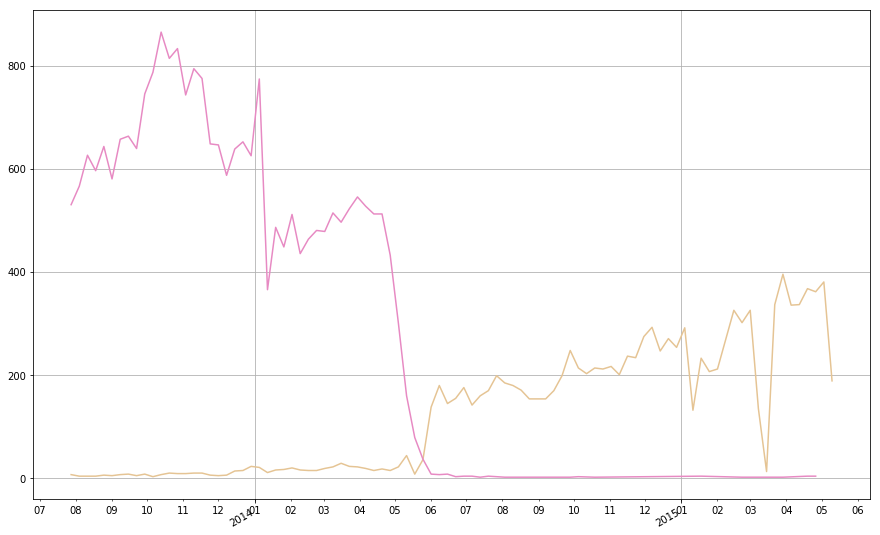

[298, 305]


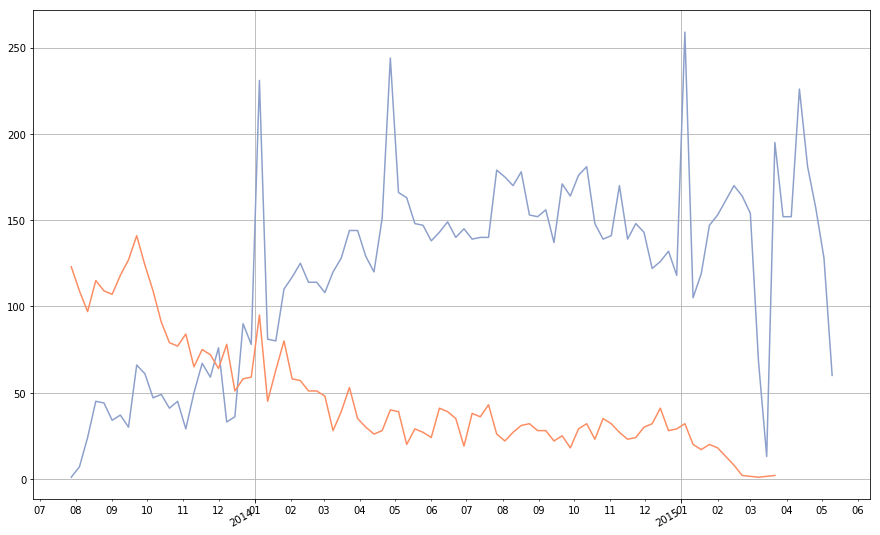

[1201, 1206]


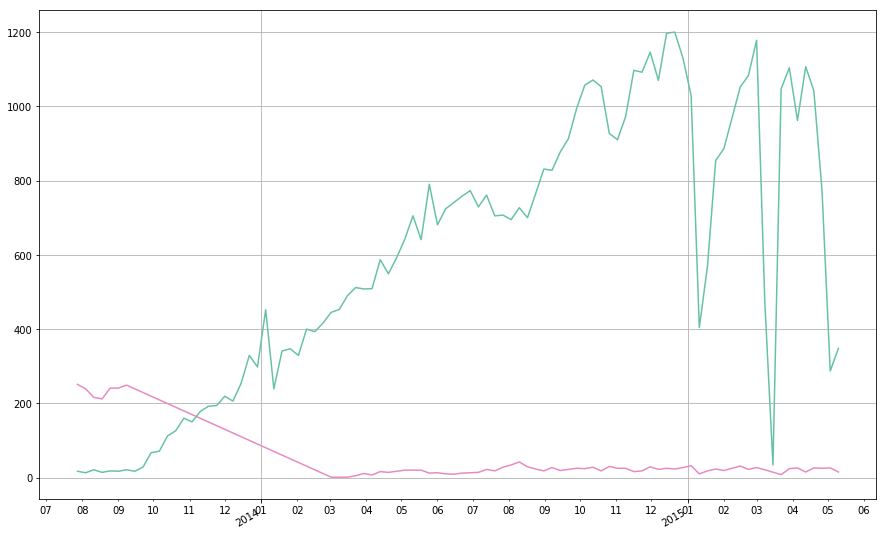

[287, 289]


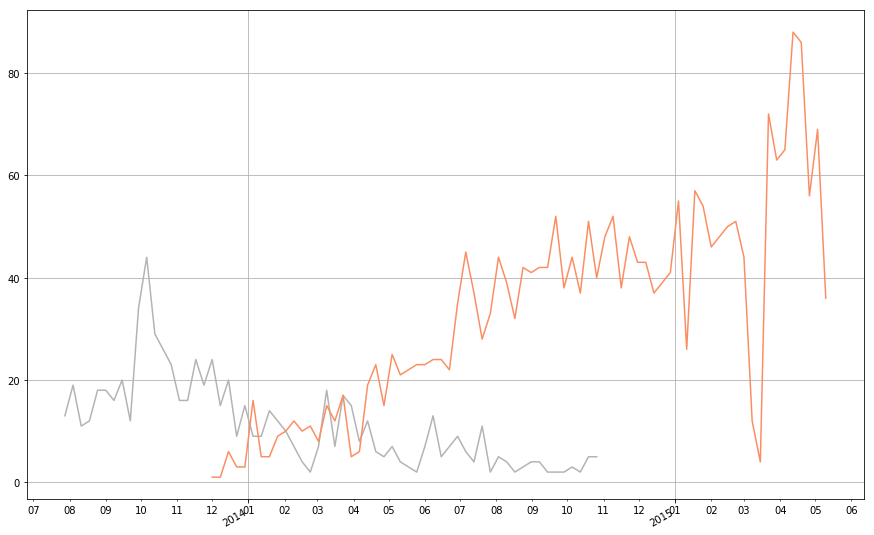

In [413]:
ucanibalizations=canibalizations.drop_duplicates(['sku1'], keep='first')
ucanibalizations=ucanibalizations.drop_duplicates(['sku2'], keep='first')
rows=list(ucanibalizations.iterrows())[:10]
for index, c in rows:
    print([int(c['sku1']),int(c['sku2'])])
    PlotVariable('UNITS', [int(c['sku1']),int(c['sku2'])])

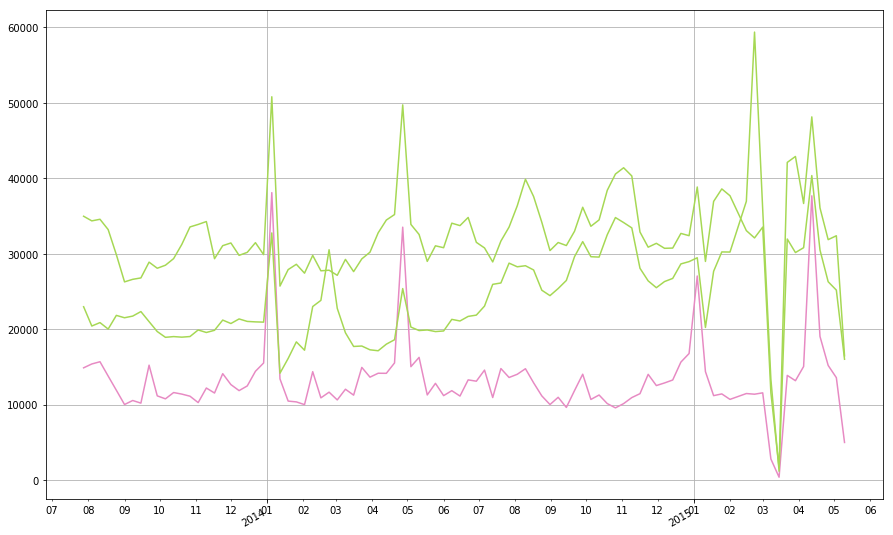

In [412]:
#PlotVariable('UNITS',_,df.CATEGORY.unique()[:3])
PlotVariable('UNITS',_,most_important_categories[:3])